# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [5]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD?format=json" #added json format
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD?format=json"

In [8]:
# Fetch current BTC price
btc_price_request = requests.get(btc_url)
btc_json = btc_price_request.json()
btc_price = btc_json["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_price_request = requests.get(eth_url)
eth_json = eth_price_request.json()
eth_price = eth_json["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $38620.80
The current value of your 5.3 ETH is $7061.45


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
api_key = os.getenv("ALPACA_API_KEY")
api_secret = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    api_key,
    api_secret,
    api_version="v2"
)

In [11]:
# Format current date as ISO format
today = pd.Timestamp("2021-01-26", tz="America/Chicago").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
2021-01-26 00:00:00-05:00  117.46  117.585  117.4255  117.51  3451493  385.41   

                                                             
                             high     low   close    volume  
2021-01-26 00:00:00-05:00  385.85  383.54  383.83  36871235

In [12]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"].item()
spy_close_price = df_portfolio["SPY"]["close"].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.51
Current SPY closing price: $383.83


In [13]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19191.50
The current value of your 200 AGG shares is $23502.00


### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
data = [["crypto",my_btc_value+my_eth_value],["shares",my_spy_value+my_agg_value]]
df_savings = pd.DataFrame(
    data = data,
    columns = ["Asset","Amount"],
).set_index("Asset")

# Display savings DataFrame
display(df_savings)

,Amount
Asset,
crypto,45682.255
shares,42693.500


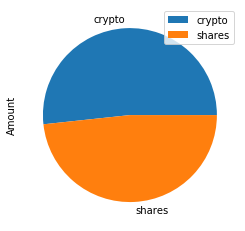

In [15]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount")

In [23]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_spy_value + my_agg_value + my_btc_value + my_eth_value

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your savings with a total value of ${round(total_savings,2)}.")
elif total_savings == emergency_fund:
    print(f"Congratulations! You have met your emergency fund goal of ${emergency_fund}.")
else:
    print(f"You are {round(emergency_fund-total_savings,2)} away from your savings goal.")

Congratulations! You have enough money in your savings with a total value of $88375.75.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [24]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2020-01-26', tz='America/Chicago').isoformat()
end_date = pd.Timestamp('2021-01-26', tz='America/Chicago').isoformat()

In [26]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
2020-01-27 00:00:00-05:00  114.14  114.1600  114.0470  114.14  3347081   
2020-01-28 00:00:00-05:00  114.10  114.1600  113.9501  114.02  2856052   
2020-01-29 00:00:00-05:00  114.13  114.3500  114.1108  114.30  2630910   
2020-01-30 00:00:00-05:00  114.28  114.5400  114.2350  114.32  5275931   
2020-01-31 00:00:00-05:00  114.48  114.6667  114.3800  114.64  4547253   

                              SPY                                      
                             open    high       low   close    volume  
2020-01-27 00:00:00-05:00  323.03  325.12  322.6600  323.52  63893322  
2020-01-28 00:00:00-05:00  325.06  327.85  323.6038  326.89  51539900  
2020-01-29 00:00:00-05:00  328.38  328.63  326.4000  326.62  41098344  
2020-01-30 00:00:00-05:00  324.36  327.91  323.5400  327.66  63015371  
2020-01-31 00:00:00-05:00  327.00  327.17  320.7400  321.74  88674257

In [27]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40,0.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [29]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
2020-01-27 00:00:00-05:00  114.14  114.1600  114.0470  114.14  3347081   
2020-01-28 00:00:00-05:00  114.10  114.1600  113.9501  114.02  2856052   
2020-01-29 00:00:00-05:00  114.13  114.3500  114.1108  114.30  2630910   
2020-01-30 00:00:00-05:00  114.28  114.5400  114.2350  114.32  5275931   
2020-01-31 00:00:00-05:00  114.48  114.6667  114.3800  114.64  4547253   

                                           SPY                            \
                          daily_return    open    high       low   close   
2020-01-27 00:00:00-05:00          NaN  323.03  325.12  322.6600  323.52   
2020-01-28 00:00:00-05:00    -0.001051  325.06  327.85  323.6038  326.89   
2020-01-29 00:00:00-05:00     0.002456  328.38  328.63  326.4000  326.62   
2020-01-30 00:00:00-05:00     0.000175  324.36  327.91  323.5400  327.66   
2020-01-31 00:00:00-05:00     0.002799  327.00  327.17  320.7400  321.74   

                                                  
                             volume daily_return  
2020-01-27 00:00:00-05:00  63893322          NaN  
2020-01-28 00:00:00-05:00  51539900     0.010417  
2020-01-29 00:00:00-05:00  41098344    -0.000826  
2020-01-30 00:00:00-05:00  63015371     0.003184  
2020-01-31 00:00:00-05:00  88674257    -0.018068

In [30]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007171,0.991565,1.022381,0.989278,0.981503,1.016396,1.016401,1.003620,0.996307,1.013357,...,0.993375,0.983194,1.008700,0.980890,0.984333,0.985707,0.988107,0.987750,1.002227,0.993403
2,1.012684,0.980250,1.022052,1.014626,0.972969,1.006014,1.032279,0.998556,1.003803,1.031981,...,0.998037,0.982592,1.002101,0.986514,0.979796,0.995346,0.967715,0.982487,1.006365,0.980982
3,1.011993,0.980464,1.030582,0.994259,0.978326,1.020005,1.025469,0.987943,1.007739,1.048220,...,0.994775,0.968193,1.005552,0.984696,1.016972,0.999658,0.969896,0.990818,1.022618,0.983869
4,0.999061,0.975739,1.052515,0.985146,0.978421,1.025365,1.028857,0.995016,0.999563,1.031148,...,1.022871,0.965899,1.006066,0.995395,1.020826,1.007674,0.951840,0.995763,1.013124,0.974024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.776104,1.537924,1.863136,2.409409,1.461346,2.417101,2.144915,1.272339,1.597252,1.669592,...,3.033214,2.382030,1.913260,4.058455,1.905573,1.898935,3.117222,1.117745,2.973061,3.275028
1257,1.758895,1.535586,1.888217,2.445297,1.436210,2.413126,2.171871,1.294590,1.555963,1.666815,...,3.065637,2.354544,1.888873,4.043382,1.888809,1.910308,3.151508,1.115057,2.933277,3.314445
1258,1.788591,1.586472,1.883059,2.492175,1.439000,2.386761,2.166657,1.268856,1.563183,1.701081,...,3.060543,2.387082,1.877079,4.127692,1.940956,1.949762,3.067145,1.143589,2.913220,3.338157
1259,1.765238,1.625298,1.880756,2.488460,1.444278,2.402950,2.134006,1.282842,1.527362,1.679620,...,3.080401,2.426097,1.893936,4.155323,1.919646,1.960969,3.064319,1.144501,2.884914,3.335351


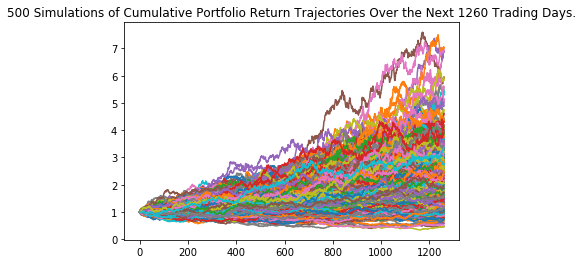

In [31]:
# Plot simulation outcomes
MC_30year.plot_simulation()

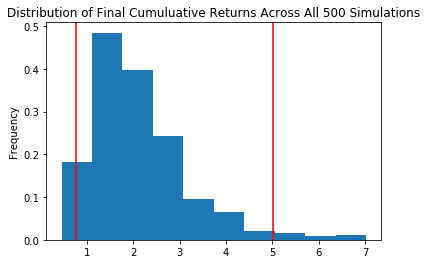

In [32]:
# Plot probability distribution and confidence intervals
MC_30year.plot_distribution()

### Retirement Analysis

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean              2.124402
std               1.073009
min               0.455566
25%               1.371184
50%               1.882633
75%               2.571822
max               7.016911
95% CI Lower      0.761516
95% CI Upper      5.014220
Name: 1260, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [35]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2) 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $15230.32 and $100284.4


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [37]:
# Set initial investment
initial_investment_2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_2 = round(summary_stats[8]*initial_investment_2,2)
ci_upper_2 = round(summary_stats[9]*initial_investment_2,2) 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_2} and ${ci_upper_2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $22845.48 and $150426.6


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.30,0.70], # changed weights to 30% bonds, 70% stocks
    num_simulation = 500,
    num_trading_days = 252*5
)

In [40]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.021328,1.000056,0.993133,0.990969,0.991789,1.011334,0.979344,1.011945,0.971747,0.978235,...,1.004667,1.006646,0.985543,1.010270,0.999485,1.019657,1.001177,0.986867,0.998873,1.002089
2,1.015605,0.961838,0.996031,0.988717,1.009058,1.040784,0.955344,0.977949,0.964265,0.976896,...,0.997572,0.995317,0.986482,0.997471,1.003449,1.031563,0.999927,1.002601,0.994375,1.012852
3,0.986217,0.955287,0.994609,1.003057,0.997940,1.037858,0.950365,0.980716,0.960461,0.962904,...,1.018043,0.990462,0.963085,0.976727,0.976197,1.042059,1.000167,1.002930,0.996493,1.003054
4,0.975062,0.963863,1.011292,0.985061,0.991312,1.041553,0.954270,0.991592,0.949225,0.946942,...,1.021937,0.979295,0.947044,0.988010,0.968410,1.053844,0.992532,0.991704,1.019937,1.012581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.978138,4.556140,2.175212,2.178382,1.944913,0.951557,1.916166,3.044598,4.731684,3.171116,...,3.589133,0.825930,4.042316,1.172812,3.457657,2.683958,3.211953,1.187871,1.629575,2.015187
1257,0.973559,4.498367,2.217242,2.186911,1.985971,0.944788,1.926540,2.951893,4.783025,3.310184,...,3.614353,0.840506,4.069390,1.152175,3.495505,2.682597,3.243030,1.227271,1.662796,2.007710
1258,0.953125,4.411860,2.250404,2.225856,1.991699,0.941766,1.937130,3.000402,4.906897,3.363793,...,3.646777,0.839561,4.024855,1.134471,3.581364,2.630568,3.271325,1.223587,1.594025,2.013160
1259,0.982089,4.399729,2.256934,2.252440,1.956367,0.932134,1.928342,2.970507,4.871072,3.377666,...,3.540039,0.836814,4.069842,1.150463,3.614570,2.687754,3.304112,1.226697,1.573251,2.006035


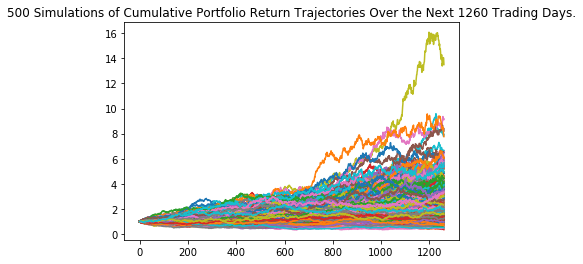

In [41]:
# Plot simulation outcomes
MC_5year.plot_simulation()

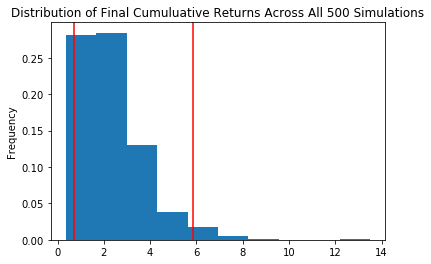

In [42]:
# Plot probability distribution and confidence intervals
MC_5year.plot_distribution()

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics_5year = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics_5year)

count           500.000000
mean              2.394959
std               1.441736
min               0.356247
25%               1.392764
50%               2.104325
75%               3.007316
max              13.503058
95% CI Lower      0.695133
95% CI Upper      5.858583
Name: 1260, dtype: float64


In [46]:
# Set initial investment
initial_investment_3 = 35000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_3 = round(summary_statistics_5year[8]*initial_investment_3,2)
ci_upper_3 = round(summary_statistics_5year[9]*initial_investment_3,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_3} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_3} and ${ci_upper_3}")

There is a 95% chance that an initial investment of $35000 in the portfolio over the next 5 years will end within in the range of $24329.64 and $205050.4


### Ten Years Retirement Option

In [47]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.20,0.80], # changed weights to 20% bonds, 80% stocks
    num_simulation = 500,
    num_trading_days = 252*10
)

In [48]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.021752,1.015239,0.996218,1.040983,1.020962,1.009729,0.996165,0.986568,1.016732,1.017728,...,0.997741,0.975563,1.010890,0.973358,0.974431,1.015707,0.987403,1.018345,1.016135,1.009333
2,1.031070,0.989620,0.987765,1.060171,1.045780,1.011724,0.981065,0.996809,1.029730,1.025219,...,0.986632,0.968674,1.045905,0.975407,0.969575,1.032909,1.035947,1.025947,0.999008,0.995681
3,1.056812,0.999446,0.993832,1.085142,1.013113,0.991436,0.982336,1.037451,1.031881,1.019805,...,0.974293,1.001322,1.032917,1.004309,1.011804,1.043656,1.014299,1.035617,0.973617,0.982352
4,1.040524,0.993465,1.001778,1.107724,1.030652,1.013755,1.024904,1.031157,1.029705,1.021955,...,0.979997,0.994839,1.049993,0.999340,1.009855,1.056158,1.018699,1.039122,0.993821,0.972560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.684322,1.971393,5.193735,11.909292,3.561955,4.058686,2.262337,15.054518,17.921801,3.595817,...,11.076664,13.225505,1.745943,5.609256,4.884615,14.238858,18.531946,2.512001,1.562003,7.285693
2517,6.700438,1.966844,5.310735,11.657201,3.574681,4.013432,2.284404,15.025500,17.921620,3.662437,...,10.859311,12.664791,1.747799,5.690543,4.846545,13.986088,18.893389,2.497826,1.552452,7.391960
2518,6.603689,1.917172,5.254768,11.407596,3.667911,4.106506,2.257672,15.154422,18.181758,3.723737,...,11.002443,12.512625,1.749699,5.641479,4.888143,14.077888,19.248870,2.522155,1.569628,7.248749
2519,6.503017,1.879949,5.210730,11.391297,3.622801,4.155418,2.195834,15.650579,17.870574,3.716218,...,11.015249,12.468533,1.781911,5.695983,4.915790,14.263541,20.046508,2.536672,1.565051,7.308110


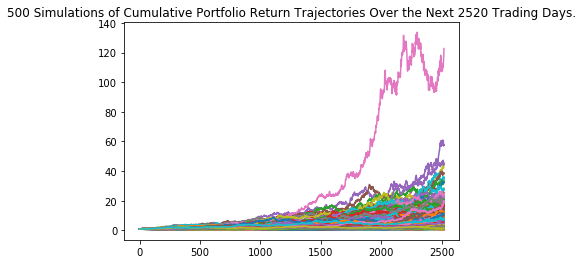

In [49]:
# Plot simulation outcomes
MC_10year.plot_simulation()

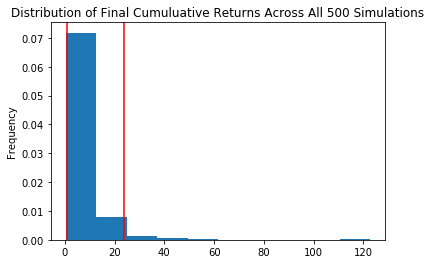

In [50]:
# Plot probability distribution and confidence intervals
MC_10year.plot_distribution()

In [51]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics_10year = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics_10year)

count           500.000000
mean              6.928704
std               8.335759
min               0.395232
25%               2.660886
50%               4.783681
75%               8.284604
max             122.678626
95% CI Lower      0.941649
95% CI Upper     23.680045
Name: 2520, dtype: float64


In [52]:
# Set initial investment
initial_investment_4 = 55000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_4 = round(summary_statistics_10year[8]*initial_investment_4,2)
ci_upper_4 = round(summary_statistics_10year[9]*initial_investment_4,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_4} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_4} and ${ci_upper_4}")

There is a 95% chance that an initial investment of $55000 in the portfolio over the next 10 years will end within in the range of $51790.71 and $1302402.47
